# References
## Hamm et al. 1987a, b
* Distribution and measurement of single-axon recurrent inhibitory post-synaptic potentials. Results here are used mostly for comparisons in a qualitatively manner.
* Simulations tryed to reproduce Figure 5 (first paper) and Figure 2 (second paper).
* The authors could obtain a proportion of motoneuron-motor axon that could be used to define the connectivity in the pool.

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* Stimulation of motor axons would require modifications on the code and would be a time consuming task. In order to simulate the experiments presented, stimulation were delivered to the soma of the motoneuron and this was considered to have the same effect as a single motor axon stimulation.
* Proportions cited in the work of Hamm and colleages is not explored in the simulations yet because of the lack of informations regarding distances.
* SOL is used here because of an error. It should be MG on the pool creation and the appropriate value for the pool boundary (according to McCurdy and Hamm (1994a)).

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import UnivariateSpline

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactoryRenshaw import SynapsesFactory
# from SynapsesFactory import SynapsesFactory

In [23]:
def simulator(numberS, numberFR, numberFF, numberRC, MNi, Parametrization):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 40
    
    if Parametrization == 'old':
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.13
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 45
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 140
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')
    
#     import pdb; pdb.set_trace()
    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    MN_mV = np.zeros((pools[0].MUnumber, len(t)))
    RC_mV = np.zeros((pools[1].Nnumber, len(t)))
    for i in xrange(0, len(t)):
        # stimulus to soma of MNi
        if t[i]>10 and t[i]<10.5:
            pools[0].iInjected[2*MNi+1] = 50
        else:
            pools[0].iInjected[2*MNi+1] = 0
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[2].atualizePool(t[i]) # RC synaptic Noise
        pools[1].atualizeInterneuronPool(t[i]) # RC pool
        for j in xrange(pools[0].MUnumber):
            MN_mV[j, i] = pools[0].v_mV[2*j+1]
        for j in xrange(pools[1].Nnumber):
            RC_mV[j, i] = pools[1].v_mV[j]

    pools[0].listSpikes()
    pools[1].listSpikes()
    
    positions = []
    for i in range(pools[0].MUnumber):
        positions.append(pools[0].unit[i].position_mm)
    
    for i in range(2):
        for j in range(4):
            for k in range(len(pools[i].unit[j].transmitSpikesThroughSynapses)):
                print pools[i].unit[j].transmitSpikesThroughSynapses[k].pool
                print pools[i].unit[j].transmitSpikesThroughSynapses[k].index
            print '----'
    
    return MN_mV, RC_mV, t, positions

In [24]:
nS = 1#75
nFR = 1#75
nFF = 2#150
nRC = 4#300
nMN = nS+nFR+nFF
MNi = (nMN)/2
params = 'final'

MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, MNi, params)

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 26 synapses were built
Synaptic Noise on RC_ext built
All the 4 synaptic noises were built
RC_ext
0
RC_ext
1
----
RC_ext
0
RC_ext
1
RC_ext
2
----
RC_ext
1
RC_ext
2
RC_ext
3
----
RC_ext
1
RC_ext
3
----
SOL
0
SOL
1
SOL
2
SOL
3
----
SOL
0
SOL
1
SOL
2
SOL
3
----
SOL
0
SOL
1
SOL
2
SOL
3
----
SOL
0
SOL
1
SOL
2
SOL
3
----


<IPython.core.display.Javascript object>


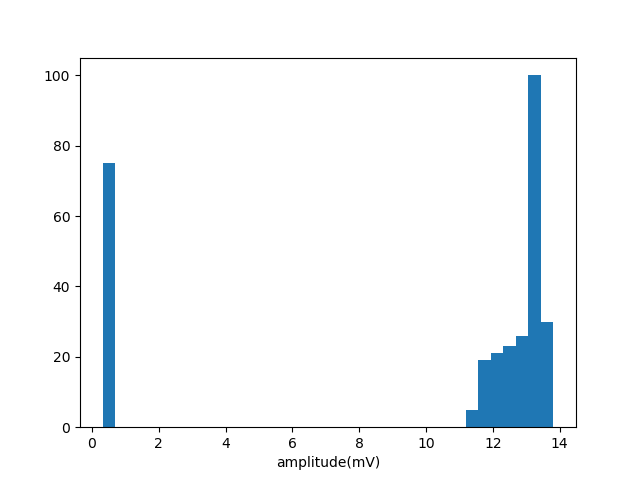

In [53]:
peaks = [abs(min(MNsignal[y,])) for y in range(MNsignal.shape[0])]
del peaks[MNi]
bins = np.linspace(min(peaks),max(peaks),len(peaks)/8)
plt.figure()
plt.hist(peaks, bins=bins)
plt.xlabel('amplitude(mV)')
plt.show()

<IPython.core.display.Javascript object>


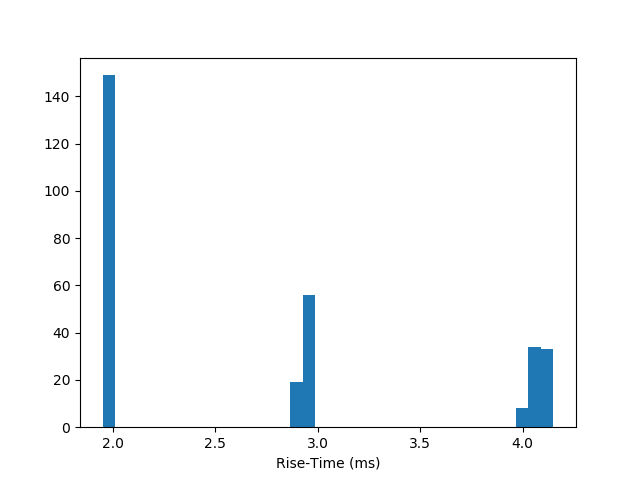

In [55]:
peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
rise_time = []

for i in range(MNsignal.shape[0]):
    if i==MNi:
        continue
    for j in range(MNsignal.shape[1]):
        if MNsignal[i,j]!=0.0:
            ti = j
            tf = np.where(MNsignal[i,]==peaks[i])[0][0]
            rise_time.append(t[tf]-t[ti])
            break
            
bins = np.linspace(min(rise_time),max(rise_time),len(rise_time)/8)
plt.figure()
plt.hist(rise_time, bins=bins)
plt.xlabel('Rise-Time (ms)')
plt.show()

<IPython.core.display.Javascript object>


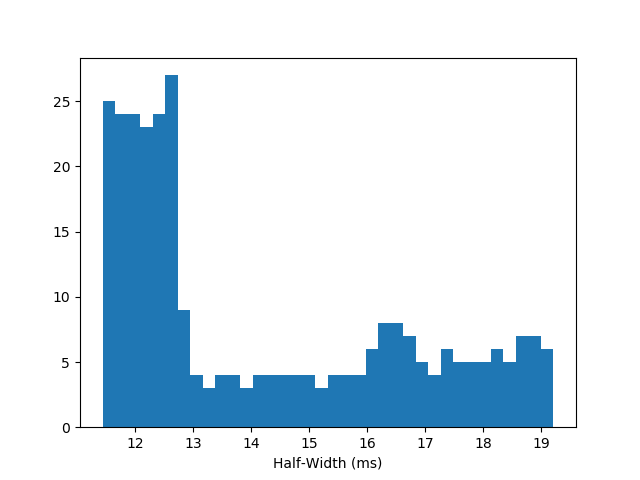

In [56]:
half_width = []

for i in range(MNsignal.shape[0]):
    if i == MNi:
        continue
    spline = UnivariateSpline(t, MNsignal[i,] - min(MNsignal[i,])/4, s=0)
    r1, r2 = spline.roots() # find the roots
    half_width.append(r2-r1)
    
bins = np.linspace(min(half_width),max(half_width),len(half_width)/8)
plt.figure()
plt.hist(half_width, bins=bins)
plt.xlabel('Half-Width (ms)')
plt.show()

0.0


<IPython.core.display.Javascript object>


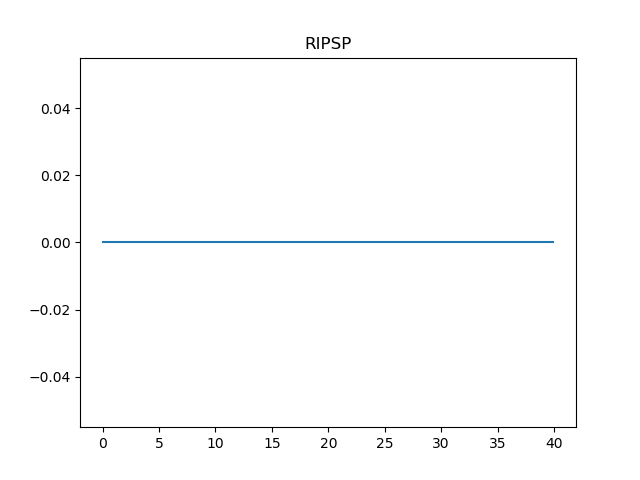

6.0


<IPython.core.display.Javascript object>


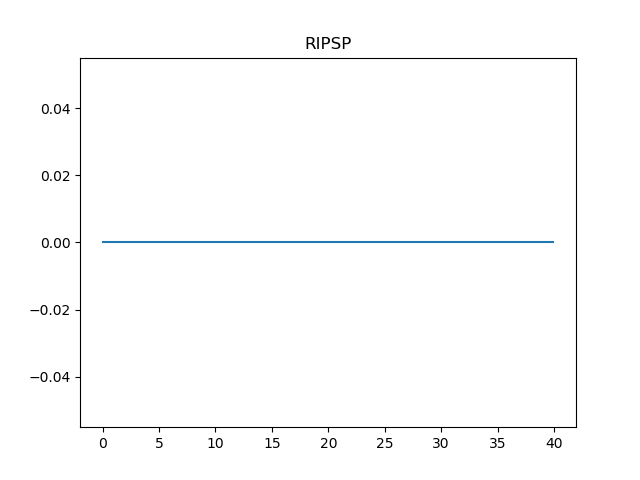

In [24]:
for i in xrange(nMN-MNi):
    if np.isclose(positions[MNi+i] - positions[MNi], 0.25, atol=5e-2) or np.isclose(positions[MNi+i] - positions[MNi], 1, atol=5e-2) or np.isclose(positions[MNi+i] - positions[MNi], 1.6, atol=5e-2):
        print positions[MNi+i] - positions[MNi]
        plt.figure()
        plt.plot(t, MNsignal[i,])
        plt.title('RIPSP')
        plt.show()

<IPython.core.display.Javascript object>


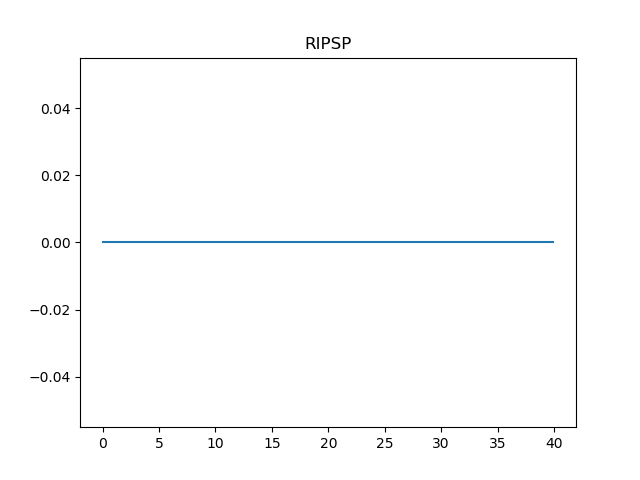

<IPython.core.display.Javascript object>


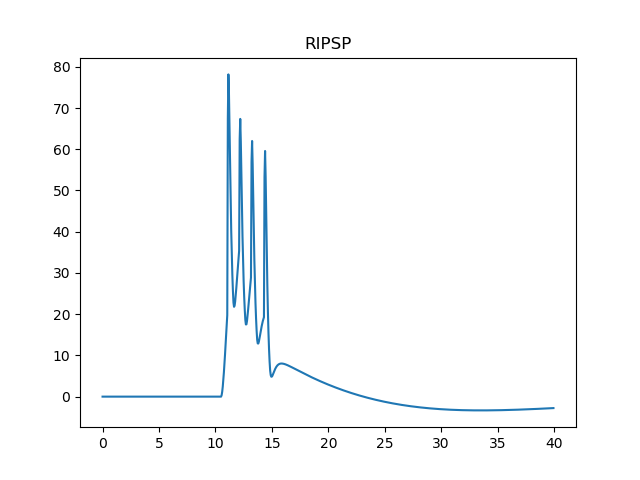

<IPython.core.display.Javascript object>


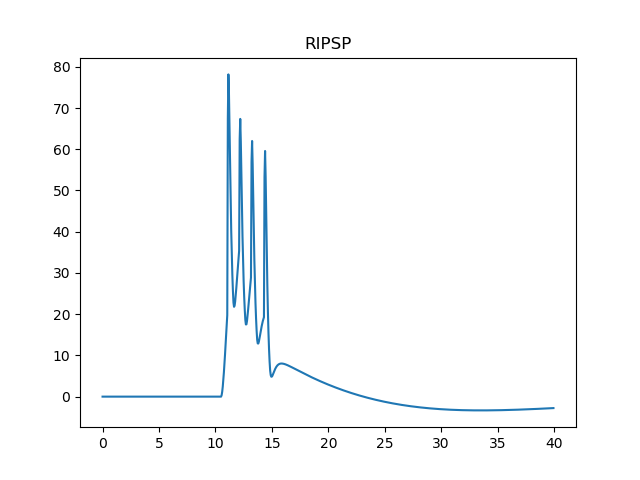

<IPython.core.display.Javascript object>


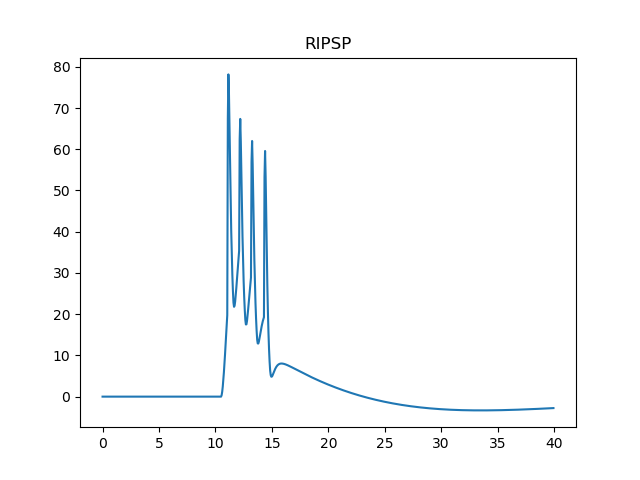

In [25]:
for i in range(4):
    plt.figure()
    plt.plot(t, RCsignal[i,])
    plt.title('RIPSP')
    plt.show()
# np.set_printoptions(threshold='nan')
# RCsignal